In [1]:
import pandas as pd
import requests
import sys
import json
from pygments import highlight, lexers, formatters
import random as rn
import numpy as np
import re
# import tweepy -  due to the restrictions of twitter in Uzbekistan, I've chosen accessing 
# the data without the twitter account

In [2]:
# step 1.1 - manually downloaded as well as stored the file and read it by using pands
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [3]:
# step 1.2 download the file by using requests
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url, allow_redirects=True)
print('content-type :', r.headers.get('content-type'))
open('image-predictions.tsv', 'wb').write(r.content)

content-type : text/tab-separated-values; charset=utf-8


335079

In [4]:
# read the file
df_image = pd.read_table('image-predictions.tsv')
df_image.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [5]:
# # import tweepy

# consumer_key = 'YOUR CONSUMER KEY'
# consumer_secret = 'YOUR CONSUMER SECRET'
# access_token = 'YOUR ACCESS TOKEN'
# access_secret = 'YOUR ACCESS SECRET'

# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth)

In [6]:
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
r = requests.get(url, allow_redirects=True)
open('tweet_json.txt', 'wb').write(r.content)

10609234

In [7]:
# to observe the full strucutre of the JSON data
sample = ''
with open('tweet_json.txt') as json_file:    
        for row in json_file: 
            sample = row
            break;
formatted_json = json.dumps(json.loads(sample), indent=4)
colorful_json = highlight(formatted_json, lexers.JsonLexer(), formatters.TerminalFormatter())
print(colorful_json)


{
    "created_at": "Tue Aug 01 16:23:56 +0000 2017",
    "id": 892420643555336193,
    "id_str": "892420643555336193",
    "full_text": "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
    "truncated": false,
    "display_text_range": [
        0,
        85
    ],
    "entities": {
        "hashtags": [],
        "symbols": [],
        "user_mentions": [],
        "urls": [],
        "media": [
            {
                "id": 892420639486877696,
                "id_str": "892420639486877696",
                "indices": [
                    86,
                    109
                ],
                "media_url": "http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg",
                "media_url_https": "https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg",
                "url": "https://t.co/MgUWQ76dJU",
                "display_url": "pic.twitter.com/MgUWQ76dJU",
                "expanded_url": "https://twitter.com/dog_rat

In [8]:
#Tweet_json data to the list and select necessary columns 
data = []
with open('tweet_json.txt') as json_file:    
        for row in json_file:      
             data.append(json.loads(row))
df_tweetapi = pd.DataFrame(data)
df_tweetapi.head(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN


In [9]:
df_tweetapi_parts = df_tweetapi[['id', 'retweet_count', 'favorite_count']]

In [10]:
df_tweetapi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

### Step 1: Summary
We gathered three dataset for the data wrangling process:
1. `twitter-archive-enhanced.csv` file (from an existing source of udacity material) to `df_archive` dataframe;
2. Programmatically downloaded the `image-predictions.tsv` by using `requests`, saved to local storage and assigned to `df_image` dataframe;
3. Programmatically downloaded the `tweet_json.txt`(url provided by udacity) file due to the limitation of twitter in Uzbekistan and assigned to `df_tweetapi` dataframe;

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

**Data quality meets six dimensions:**

- **accuracy --> How well does a piece of information reflect reality?**
- **Completeness --> Does it fulfill your expectations of what’s comprehensive?**
- **Consistency --> Does information stored in one place match relevant data stored elsewhere?**
- **Timeliness --> Is your information available when you need it?**
- **Validity --> Is information in a specific format, does it follow business rules, or is it in an unusable format?**
- **Uniqueness --> Is this the only instance in which this information appears in the database?**

**The requirements for tidiness:**

- **Each variable forms a column**
- **Each observation forms a row**
- **Each type of observational unit forms a table**

### Assessing the archived twitter data

In [11]:
# whole archive dataset for visually assessing
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [12]:
# Programmatically assessing
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
# Programmatically assessing
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
# reviewing the source
df_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [15]:
# examining non-reliable numerators
df_archive.query('rating_numerator > 20').shape

(24, 17)

In [16]:
df_archive.query('rating_numerator > 20').head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,194351775.0,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,13615722.0,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,21955058.0,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [17]:
# visually reviewing the unique names
df_archive['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [18]:
# finding the unrealistic names in the name column of df_archive
df_archive[df_archive['name'].astype(str).map(len) <= 2].head(40)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mo. No one will push him around in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512...,11,10,Mo,None,None,None,None
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
449,819004803107983360,NaN,NaN,2017-01-11 02:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
553,804026241225523202,NaN,NaN,2016-11-30 18:16:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's going to make me cry. 13/10 p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804026241...,13,10,Bo,None,None,None,None
583,800188575492947969,NaN,NaN,2016-11-20 04:06:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He's a Benedoop Cum...,6.816941e+17,4.196984e+09,2015-12-29 04:31:49 +0000,https://twitter.com/dog_rates/status/681694085...,11,10,Bo,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
679,789137962068021249,NaN,NaN,2016-10-20 16:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's a West Congolese Bugaboop Snu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789137962...,12,10,Bo,None,None,None,None
686,788070120937619456,NaN,NaN,2016-10-17 17:32:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo and Ty. Bo eats pape...,7.610045e+17,4.196984e+09,2016-08-04 01:03:17 +0000,https://twitter.com/dog_rates/status/761004547...,11,10,Bo,None,None,None,None
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None


In [19]:
# shape of the unrealistic names
df_archive[df_archive['name'].astype(str).map(len) <= 2].shape

(79, 17)

In [20]:
df_archive[df_archive['retweeted_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [21]:
df_archive['text']

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
                              ...                        
2351    Here we have a 1949 1st generation vulpix. Enj...
2352    This is a purebred Piers Morgan. Loves to Netf...
2353    Here is a very happy pup. Big fan of well-main...
2354    This is a western brown Mitsubishi terrier. Up...
2355    Here we have a Japanese Irish Setter. Lost eye...
Name: text, Length: 2356, dtype: object

printing numerator and denominator for actually seeing difference from orignal inside text. Regex tested url: [regexr.com/65fmu](https://regexr.com/65fmu)

In [22]:
count = 0
error_indexes = []
for index, text in df_archive['text'].iteritems():
    try:
        found = re.search('(\d+)\/\d+', text).group(0)
        (new_rating_numerator, new_rating_denominator) = found.split('/')
        if int(new_rating_numerator) != int(df_archive['rating_numerator'][index]):
            print(text)
            count = count + 1
        if int(new_rating_denominator) != int(df_archive['rating_denominator'][index]):
            print(text)
            count = count + 1
    except AttributeError:
        print ('Regex parsing Error ---> :', index, ' ', text)
        found = '' # apply your error handling
        error_indexes.append(index)
    except ValueError:
        print('Error splitting--> : ', text)
        error_indexes.append(index)


In [23]:
print('There are ', count, ' difference in numerator rating and denominator rating, following is error indexes: ')
error_indexes

There are  0  difference in numerator rating and denominator rating, following is error indexes: 


[]

### Assesing Image prediction data which is made by using nerual network

In [24]:
df_image.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1824,835152434251116546,https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg,3,swing,0.967066,False,American_Staffordshire_terrier,0.012731,True,Staffordshire_bullterrier,0.007039,True
906,700167517596164096,https://pbs.twimg.com/media/Cbd-o8hWwAE4OFm.jpg,1,beagle,0.162585,True,Pembroke,0.120481,True,Siberian_husky,0.110284,True
90,667538891197542400,https://pbs.twimg.com/media/CUOTFZOW4AABsfW.jpg,1,Yorkshire_terrier,0.618957,True,silky_terrier,0.300313,True,Australian_terrier,0.053412,True
1321,756303284449767430,https://pbs.twimg.com/media/Cn7tyyZWYAAPlAY.jpg,1,golden_retriever,0.981652,True,cocker_spaniel,0.006790,True,Labrador_retriever,0.004325,True
256,670764103623966721,https://pbs.twimg.com/media/CU8IY0pWIAA2AJ-.jpg,1,Norfolk_terrier,0.172850,True,golden_retriever,0.072702,True,television,0.037494,False
277,670842764863651840,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1,microphone,0.096063,False,accordion,0.094075,False,drumstick,0.061113,False
794,690932576555528194,https://pbs.twimg.com/media/CZavgf4WkAARpFM.jpg,1,snorkel,0.526536,False,muzzle,0.048089,False,scuba_diver,0.034226,False
483,675432746517426176,https://pbs.twimg.com/media/CV-ef64WoAAbh0I.jpg,1,Labrador_retriever,0.986548,True,golden_retriever,0.008862,True,Chihuahua,0.000694,True
669,683078886620553216,https://pbs.twimg.com/media/CXrIntsUsAEkv0d.jpg,1,koala,0.141432,False,Eskimo_dog,0.094044,True,wallaby,0.085237,False
625,680798457301471234,https://pbs.twimg.com/media/CXKuiyHUEAAMAGa.jpg,1,ram,0.499761,False,hog,0.283795,False,ox,0.067455,False


In [25]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
# to check if there are some misisng values
df_image[df_image['jpg_url'].astype(str).map(len) <= 3].shape

(0, 12)

In [27]:
df_image.groupby(['jpg_url'])['tweet_id'].count().sort_values(ascending=False)

jpg_url
https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg                2
https://pbs.twimg.com/media/C2oRbOuWEAAbVSl.jpg                2
https://pbs.twimg.com/media/CpmyNumW8AAAJGj.jpg                2
https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg                2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg                2
                                                              ..
https://pbs.twimg.com/media/CVHdK-7WwAAsuyc.jpg                1
https://pbs.twimg.com/media/CVHRIiqWEAAj98K.jpg                1
https://pbs.twimg.com/media/CVHOgDvU4AAfrXD.jpg                1
https://pbs.twimg.com/media/CVHMyHMWwAALYXs.jpg                1
https://pbs.twimg.com/tweet_video_thumb/CtTFZZfUsAE5hgp.jpg    1
Name: tweet_id, Length: 2009, dtype: int64

In [28]:

df_image.groupby(['jpg_url', 'tweet_id'])[['jpg_url', 'tweet_id']].count()

jpg_url  \
jpg_url                                            tweet_id                      
https://pbs.twimg.com/ext_tw_video_thumb/674805... 674805413498527744        1   
https://pbs.twimg.com/ext_tw_video_thumb/675354... 675354435921575936        1   
                                                   752309394570878976        1   
https://pbs.twimg.com/ext_tw_video_thumb/675740... 675740360753160193        1   
https://pbs.twimg.com/ext_tw_video_thumb/676776... 676776431406465024        1   
...                                                                        ...   
https://pbs.twimg.com/tweet_video_thumb/CZ0mhdu... 692752401762250755        1   
https://pbs.twimg.com/tweet_video_thumb/CeBym7o... 711694788429553666        1   
                                                   761371037149827077        1   
https://pbs.twimg.com/tweet_video_thumb/CeGGkWu... 711998809858043904        1   
https://pbs.twimg.com/tweet_video_thumb/CtTFZZf... 780476555013349377        1   

                                                                       tweet_id  
jpg_url                                            tweet_id                      
https://pbs.twimg.com/ext_tw_video_thumb/674805... 674805413498527744         1  
https://pbs.twimg.com/ext_tw_video_thumb/675354... 675354435921575936         1  
                                                   752309394570878976         1  
https://pbs.twimg.com/ext_tw_video_thumb/675740... 675740360753160193         1  
https://pbs.twimg.com/ext_tw_video_thumb/676776... 676776431406465024         1  
...                                                                         ...  
https://pbs.twimg.com/tweet_video_thumb/CZ0mhdu... 692752401762250755         1  
https://pbs.twimg.com/tweet_video_thumb/CeBym7o... 711694788429553666         1  
                                                   761371037149827077         1  
https://pbs.twimg.com/tweet_video_thumb/CeGGkWu... 711998809858043904         1  
https://pbs.twimg.com/tweet_video_thumb/CtTFZZf... 780476555013349377         1  

[2075 rows x 2 columns]

### Assesing Twitter Query API data

In [29]:
df_tweetapi

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,False,False,en,NaN,NaN,NaN,NaN
2350,Mon Nov 16 00:04:52 +0000 2015,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,False,False,en,NaN,NaN,NaN,NaN
2351,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,666033412701032449,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,False,False,en,NaN,NaN,NaN,NaN
2352,Sun Nov 15 23:05:30 +0000 2015,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,False,False,en,NaN,NaN,NaN,NaN


In [30]:
df_tweetapi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

In [31]:
rn.choice(df_tweetapi.user)

{'id': 4196983835,
 'id_str': '4196983835',
 'name': 'WeRateDogs™ (author)',
 'screen_name': 'dog_rates',
 'location': 'DM YOUR DOGS, WE WILL RATE',
 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com',
 'url': 'https://t.co/N7sNNHAEXS',
 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS',
     'expanded_url': 'http://weratedogs.com',
     'display_url': 'weratedogs.com',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 3201009,
 'friends_count': 104,
 'listed_count': 2812,
 'created_at': 'Sun Nov 15 21:41:29 +0000 2015',
 'favourites_count': 114031,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': True,
 'statuses_count': 5288,
 'lang': 'en',
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': '000000',
 'prof

In [32]:
# Printing common columns of three dataset above
intersected_col = pd.Series(list(df_archive) + list(df_image) + list(df_tweetapi))
intersected_col[intersected_col.duplicated()]

17                 tweet_id
37                   source
38    in_reply_to_status_id
40      in_reply_to_user_id
dtype: object

### Quality issues
### **`df_archive` table issues:**
1.  Remove retweets for keeping only original tweets. `drop` operation is to be used if `retweeted_status_id` is not null

2. `timestamp` and `retweeted_status_timestamp` should be converted from object to datetime;

3. `Name` column have some invalid values. Invalid means None, non-existing names('just') and less than two characters;

4. Some other columns have `None` values which requires to change it to `NULL(NAN)`;

5. `rating_numerator` and `rating_denominator` have non-reliable/invalid values;

6. Change type of `rating_numerator` and `rating_denominator` columns to float;

7. Extract keyword from `source` column

8. we might work on `timestamp` column by extracting it to a needed format for our analysis 

### **`df_image` table issues:**
1. Some tweet_ids have the same jpg_url

2. Same `jpg_urls` have two different tweet_ids, that are retweets.

### **`df_tweetapi` table issues:**

1. Change `id` columnt to `tweet_id` for match of other tables
2. `created_at` column type should be datetime


### Tidiness issues
1. Convert dog stage columns(doggo, floofer, pupper, puppo) to single column
2. Merge three tables above into the single table
3. Keep only neccessary columns in the merged table or remove unneccessary columns from all three tables above


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

#### Step 3. Cleaning process of data-wrangling
- Define
- Code
- Test

In [33]:
# Copies of original pieces of data
df_archive_clean = df_archive.copy()
df_image_clean = df_image.copy()
df_tweetapi_clean = df_tweetapi.copy()
print('Size of df_archive_clean:', df_archive_clean.shape[0])
print('Size of df_image_clean:', df_image_clean.shape[0])
print('Size of df_tweetapi_clean:', df_tweetapi_clean.shape[0])

Size of df_archive_clean: 2356
Size of df_image_clean: 2075
Size of df_tweetapi_clean: 2354


### `df_archive_clean` table
### Define #1
Remove retweets for keeping only original tweets. `drop` operation is to be used if `retweeted_status_id` is not null

### Code

In [34]:
df_archive_clean.drop(df_archive_clean.query('retweeted_status_id == retweeted_status_id').index, inplace = True)

### Test

In [35]:
df_archive_clean.query('retweeted_status_id == retweeted_status_id')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [36]:
print('Size of df_archive_clean after drop: ', df_tweetapi_clean.shape[0])

Size of df_archive_clean after drop:  2354


In [37]:
count = 0
for x in df_archive_clean['retweeted_status_id']:
    x = str(x)
    if x != 'nan':
        print(x)
        count = count + 1
#     break
print('Count should be zero, so result: ', count)

Count should be zero, so result:  0


## Define #2
``timestamp`` and ``retweeted_status_timestamp`` should be converted from object to datetime;


### Code

In [38]:
df_archive_clean['timestamp'] = pd.to_datetime(df_archive['timestamp'])
df_archive_clean['retweeted_status_timestamp'] = pd.to_datetime(df_archive['retweeted_status_timestamp'])

### Test

In [39]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

## Define #3
`name` column have some invalid values. Invalid means None, non-existing names('just') and less than two characters;

### Code

In [40]:
# Convert object to string
df_archive_clean['name'] = df_archive_clean['name'].astype(str)

In [41]:
df_archive_clean = df_archive_clean[df_archive_clean['name'].apply(lambda x: (len(x) > 2 ))] 
#  for dropping None and just...
df_archive_clean.drop(df_archive_clean.query('name == "None" or name=="just"').index, inplace=True)

### Test

In [42]:
# Visually testing
df_archive_clean['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'Jax', 'Zoey',
       'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes

In [43]:
# Programatically testing
print(df_archive['name'].size - df_archive_clean['name'].size, 'rows found Invalid and dropped')

939 rows found Invalid and dropped


## Define #4
Some other columns have None values which requires to change it to ''[empty space]

### Code

In [44]:
none_col_list = []

In [45]:
def none_columns(x, column):
    if column not in none_col_list:
        none_col_list.append(column)
    return x

In [46]:
for column in df_archive_clean.columns:
    for index, value in df_archive_clean[column].iteritems():
        df_archive_clean[column][index] = none_columns(value, column)
        if value == 'None':
            df_archive_clean[column][index] = ''  

<ipython-input-46-b918514f213a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_archive_clean[column][index] = none_columns(value, column)
<ipython-input-46-b918514f213a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_archive_clean[column][index] = ''


In [47]:
print('Following columns has been affeceted by changing from None to numpy.nan')
none_col_list

Following columns has been affeceted by changing from None to numpy.nan


['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

### Test

In [48]:
# Visual testing
df_archive_clean.sample(40)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
897,759047813560868866,NaN,NaN,2016-07-29 15:27:55+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Spencer. He's part of the Queen's Guar...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/759047813...,11,10,Spencer,,,,
471,816697700272001025,NaN,NaN,2017-01-04 17:27:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Binky. She appears to be rather h*ckin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/816697700...,12,10,Binky,,,,
1790,677530072887205888,NaN,NaN,2015-12-17 16:45:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Axel. He's a Black Chevy Pinot on...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/677530072...,9,10,Axel,,,,
2173,669324657376567296,NaN,NaN,2015-11-25 01:20:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Ralf. He's a miniature Buick DiCaprio. Ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/669324657...,11,10,Ralf,,,,
1162,723688335806480385,NaN,NaN,2016-04-23 01:41:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Reginald. He starts screaming at rando...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/723688335...,12,10,Reginald,,,,
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaT,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,,,,
1898,674690135443775488,NaN,NaN,2015-12-09 20:40:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Patrick. He's an exotic pup. Jumps great ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/674690135...,3,10,Patrick,,,,
2317,666644823164719104,NaN,NaN,2015-11-17 15:51:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Jimothy. He is a Botwanian Gouda. Can ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666644823...,9,10,Jimothy,,,,
974,750056684286914561,NaN,NaN,2016-07-04 20:00:23+00:00,"<a href=""https://about.twitter.com/products/tw...",This is Jameson. He had a few too many in the ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/750056684...,11,10,Jameson,,,,
1812,676811746707918848,NaN,NaN,2015-12-15 17:11:09+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Penny &amp; Gizmo. They are pract...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/676811746...,9,10,Penny,,,,


## Define #5
`rating_numerator and rating_denominator` have non-reliable/invalid values;

### Code

In [49]:
## Fixing decimal values
ratings = df_archive_clean['text'].str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
df_archive_clean['rating_numerator'] = ratings[0]

### Test

In [50]:
df_archive_clean[df_archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]

/Users/sanatbek/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/883482846...,13.5,10,Bella,,,,
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,,,,
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,,,pupper,


## Define #6
change type of `rating_numerator` and `rating_denominator` columns to float;

### Code

In [51]:
df_archive_clean['rating_denominator'] = df_archive_clean['rating_denominator'].astype(float)
df_archive_clean['rating_numerator'] = df_archive_clean['rating_numerator'].astype(float)

### Test

In [52]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1417 entries, 0 to 2346
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1417 non-null   int64              
 1   in_reply_to_status_id       1 non-null      float64            
 2   in_reply_to_user_id         1 non-null      float64            
 3   timestamp                   1417 non-null   datetime64[ns, UTC]
 4   source                      1417 non-null   object             
 5   text                        1417 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               1417 non-null   object             
 10  rating_numerator            1417 non-null   float64         

## Define #7
Extract `keyword` from `source` url for making it readible

### Code

In [53]:
print(df_archive_clean['source'][0])
# regex to extract required strings
reg_str = r'>(.*)<' 
for index, source in df_archive_clean['source'].iteritems():
    res = re.findall(reg_str, df_archive_clean['source'][index])
    df_archive_clean['source'][index] = str(res[0])

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>


<ipython-input-53-87977c0bc468>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_archive_clean['source'][index] = str(res[0])


### Test

In [54]:
df_archive_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,,,,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,,,,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,,,,


## Define #8 (#1 from tidiness)
Convert dog stage columns(doggo, floofer, pupper, puppo) to single column

### Code


In [55]:
# Below, I am going to merge all dogs types to `dog_stage` column
df_archive_clean.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,,,,,1227
1,,,,puppo,16
2,,,pupper,,126
3,,floofer,,,5
4,doggo,,,,39
5,doggo,,pupper,,4


In [56]:
# concatinating if some dogs have two type
df_archive_clean['dog_stage'] = df_archive_clean['doggo'] + df_archive_clean['floofer'] + df_archive_clean['pupper'] + df_archive_clean['puppo']
df_archive_clean.loc[df_archive_clean['dog_stage'] == 'doggopupper', 'dog_stage'] = 'doggo,pupper'
df_archive_clean.loc[df_archive_clean['dog_stage'] == 'doggopuppo', 'dog_stage'] = 'doggo,puppo'
df_archive_clean.loc[df_archive_clean['dog_stage'] == 'doggofloofer', 'dog_stage'] = 'doggo,floofer'
df_archive_clean.loc[df_archive_clean.dog_stage == '', 'dog_stage'] = 'None'

### Test

In [57]:
df_archive_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,,,,,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,,,,,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,,,,,None


In [58]:
df_archive_clean['dog_stage'].value_counts()

None            1227
pupper           126
doggo             39
puppo             16
floofer            5
doggo,pupper       4
Name: dog_stage, dtype: int64

## `df_image_clean` table

## Define #9 (#1 from df_image table issues)

Some `tweet_ids` have the same `jpg_url`. Need to drop duplicate pictures.

### Code

In [59]:
df_image_clean = df_image_clean.drop_duplicates('jpg_url')

### Test

In [60]:
df_image_clean.groupby(['jpg_url'])['tweet_id'].count().sort_values(ascending=False)

jpg_url
https://pbs.twimg.com/ext_tw_video_thumb/674805331965399040/pu/img/-7bw8niVrgIkLKOW.jpg    1
https://pbs.twimg.com/media/Cdjiqi6XIAIUOg-.jpg                                            1
https://pbs.twimg.com/media/Ce1oLNqWAAE34w7.jpg                                            1
https://pbs.twimg.com/media/Ce14cOvWwAAcFJH.jpg                                            1
https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg                                            1
                                                                                          ..
https://pbs.twimg.com/media/CVHG6_AWwAEJf_u.jpg                                            1
https://pbs.twimg.com/media/CVHEju0XAAEUZRY.jpg                                            1
https://pbs.twimg.com/media/CVGwAh-W4AAIHJz.jpg                                            1
https://pbs.twimg.com/media/CVGp4LKWoAAoD03.jpg                                            1
https://pbs.twimg.com/tweet_video_thumb/CtTFZZfUsAE5hgp.jpg   

In [61]:
sum(df_image_clean['jpg_url'].duplicated()) # The result should be zero...

0

### Define #10 (#1 from df_twitterapi table)
Change `id` column to `tweet_id` for match of other tables

In [62]:
df_tweetapi_clean.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN


In [63]:
df_tweetapi_clean = df_tweetapi_clean.rename(columns={'id': 'tweet_id'})

### Test

In [64]:
df_tweetapi_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   tweet_id                       2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

## Define #11 (#3 from tidiness issues)

**Keep only neccessary columns in the merged table** or **remove unneccessary columns from all three tables above**

### Code

In [65]:
## 1st table. Cleaning of df_archive_clean by dropping unneccessary columns
df_archive_clean = df_archive_clean.drop([ 'in_reply_to_user_id', 'text', 'retweeted_status_id', 'retweeted_status_user_id',\
 'retweeted_status_timestamp', 'doggo', 'floofer', 'pupper', 'puppo', 'in_reply_to_status_id'], 1)

# 1st table. Re-indexing
df_archive_clean = df_archive_clean.reset_index(drop=True)

In [66]:
## 2nd table. Cleaning of df_image_clean by subsituting the dataframe into `image_prediction` column and the level of `confidence`
image_predictions = []
image_confidence_level = []

def predict_dog_func(df):
    if df['p1_dog'] == True:
        image_predictions.append(df['p1'])
        image_confidence_level.append(df['p1_conf'])
    elif df['p2_dog'] == True:
        image_predictions.append(df['p2'])
        image_confidence_level.append(df['p2_conf'])
    elif df['p3_dog'] == True:
        image_predictions.append(df['p3'])
        image_confidence_level.append(df['p3_conf'])
    else:
        image_predictions.append(np.nan)
        image_confidence_level.append(0)

## 2nd table. continue
df_image_clean.apply(predict_dog_func, axis=1)
df_image_clean['img_predictions'] = image_predictions
df_image_clean['img_confidence_level'] = image_confidence_level

## 2nd table. dropping extra columns
df_image_clean = df_image_clean.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
                                                    'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)

# 2nd table. Re-indexing
df_image_clean = df_image_clean.reset_index(drop=True)

In [67]:
## 3rd table. Getting `favourites count` and `followers_count` from twitter api query `user` count
# df_tweetapi_clean['favourites_count'] = pd.Series(np.array([]))
# df_tweetapi_clean['followers_count'] = pd.Series(np.array([]))
# for index, value in df_tweetapi_clean['user'].iteritems():
#     df_tweetapi_clean['favourites_count'][index] = value['favourites_count']
#     df_tweetapi_clean['followers_count'][index] = value['followers_count']

for key in df_tweetapi_clean.user.to_dict().keys():
    df_tweetapi_clean['followers_count'] = df_tweetapi_clean.user[key]['followers_count']
    df_tweetapi_clean['favourites_count'] = df_tweetapi_clean.user[key]['favourites_count']

# 3rd table. cleaning
df_tweetapi_clean = df_tweetapi_clean.loc[:, ['tweet_id', 'favourites_count', 'retweet_count', 'followers_count', 'created_at']]

# 3rd table. Re-indexing
df_tweetapi_clean = df_tweetapi_clean.reset_index(drop=True)

### Test

In [68]:
# 1st table test
df_archive_clean.head()

,tweet_id,timestamp,source,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None


In [69]:
# 2nd table test
df_image_clean.head()

,tweet_id,jpg_url,img_num,img_predictions,img_confidence_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


In [70]:
# 3rd table test
df_tweetapi_clean.head()

,tweet_id,favourites_count,retweet_count,followers_count,created_at
0,892420643555336193,114031,8853,3201018,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,114031,6514,3201018,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,114031,4328,3201018,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,114031,8964,3201018,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,114031,9774,3201018,Sat Jul 29 16:00:24 +0000 2017


### Define #12 (#2 from tidiness table)
Merge three tables above into the single table

### Code

In [71]:
df_master_clean = pd.merge(pd.merge(df_archive_clean, df_image_clean, on='tweet_id', how='inner'), df_tweetapi_clean, on='tweet_id', how='inner')


In [72]:
df_master_clean.shape

(1370, 16)

### Test

In [73]:
list(df_master_clean)

['tweet_id',
 'timestamp',
 'source',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage',
 'jpg_url',
 'img_num',
 'img_predictions',
 'img_confidence_level',
 'favourites_count',
 'retweet_count',
 'followers_count',
 'created_at']

### Step 4: Storing Data

In [74]:
df_master_clean.to_csv('twitter_archive_master.csv', index=False)

## Step 5: Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [75]:
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import matplotlib.font_manager
%matplotlib inline

In [76]:
df = pd.read_csv('twitter_archive_master.csv')
df.head(2)

,tweet_id,timestamp,source,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,img_predictions,img_confidence_level,favourites_count,retweet_count,followers_count,created_at
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,0.000000,114031,8853,3201018,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,114031,6514,3201018,Tue Aug 01 00:17:27 +0000 2017


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              1370 non-null   int64  
 1   timestamp             1370 non-null   object 
 2   source                1370 non-null   object 
 3   expanded_urls         1370 non-null   object 
 4   rating_numerator      1370 non-null   float64
 5   rating_denominator    1370 non-null   float64
 6   name                  1370 non-null   object 
 7   dog_stage             1370 non-null   object 
 8   jpg_url               1370 non-null   object 
 9   img_num               1370 non-null   int64  
 10  img_predictions       1203 non-null   object 
 11  img_confidence_level  1370 non-null   float64
 12  favourites_count      1370 non-null   int64  
 13  retweet_count         1370 non-null   int64  
 14  followers_count       1370 non-null   int64  
 15  created_at           

In [78]:
# sort the the table by timestamp
df = df.sort_values('timestamp')

df.tweet_id = df.tweet_id.astype(object)
df.timestamp = pd.to_datetime(df.timestamp)

# making timestamp as index
df.set_index('timestamp', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1370 entries, 2015-11-16 01:01:59+00:00 to 2017-08-01 16:23:56+00:00
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              1370 non-null   object 
 1   source                1370 non-null   object 
 2   expanded_urls         1370 non-null   object 
 3   rating_numerator      1370 non-null   float64
 4   rating_denominator    1370 non-null   float64
 5   name                  1370 non-null   object 
 6   dog_stage             1370 non-null   object 
 7   jpg_url               1370 non-null   object 
 8   img_num               1370 non-null   int64  
 9   img_predictions       1203 non-null   object 
 10  img_confidence_level  1370 non-null   float64
 11  favourites_count      1370 non-null   int64  
 12  retweet_count         1370 non-null   int64  
 13  followers_count       1370 non-null   int64  
 14  created_at            13

In [79]:
df.describe()

,rating_numerator,rating_denominator,img_num,img_confidence_level,favourites_count,retweet_count,followers_count
count,1370.000000,1370.000000,1370.000000,1370.000000,1370.0,1370.000000,1370.0
mean,12.168993,10.144526,1.207299,0.485162,114031.0,2734.094891,3201018.0
std,48.025299,4.455886,0.570217,0.336675,0.0,3842.289946,0.0
min,2.000000,7.000000,1.000000,0.000000,114031.0,23.000000,3201018.0
25%,10.000000,10.000000,1.000000,0.179083,114031.0,711.000000,3201018.0
50%,11.000000,10.000000,1.000000,0.482475,114031.0,1540.500000,3201018.0
75%,12.000000,10.000000,1.000000,0.799493,114031.0,3346.250000,3201018.0
max,1776.000000,170.000000,4.000000,0.999953,114031.0,56625.000000,3201018.0


#### Percentage of dogs stage distribution

In [80]:
y = df['dog_stage'].value_counts()[1:6]
y

pupper          120
doggo            37
puppo            15
floofer           5
doggo,pupper      4
Name: dog_stage, dtype: int64

In [81]:
# wil manually copy doge stages excluding none, below cell
labels = df['dog_stage'].unique()
labels

array(['None', 'pupper', 'floofer', 'doggo', 'puppo', 'doggo,pupper'],
      dtype=object)

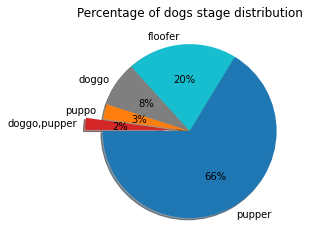

In [82]:
labels = ['pupper', 'floofer', 'doggo', 'puppo', 'doggo,pupper']
colors = ['tab:blue', 'tab:cyan', 'tab:gray', 'tab:orange', 'tab:red']
explode = [0, 0, 0, 0, 0.2]

fig, ax = plt.subplots()
ax.pie(y, labels = labels,
          colors = colors,
          autopct='%.0f%%',
          explode = explode,
          shadow = True,
          startangle = 180)

ax.set_title('Percentage of dogs stage distribution')
plt.show()

#### Most common names of the dogs

In [83]:
counts = df['name'].value_counts()[0:17]
counts

Charlie    11
Cooper     10
Lucy       10
Oliver     10
Penny       9
Tucker      9
Sadie       8
Winston     8
Daisy       7
Toby        7
the         7
Lola        7
Stanley     6
Koda        6
Jax         6
Bella       6
Dave        5
Name: name, dtype: int64

In [84]:
x = counts.index
x

Index(['Charlie', 'Cooper', 'Lucy', 'Oliver', 'Penny', 'Tucker', 'Sadie',
       'Winston', 'Daisy', 'Toby', 'the', 'Lola', 'Stanley', 'Koda', 'Jax',
       'Bella', 'Dave'],
      dtype='object')

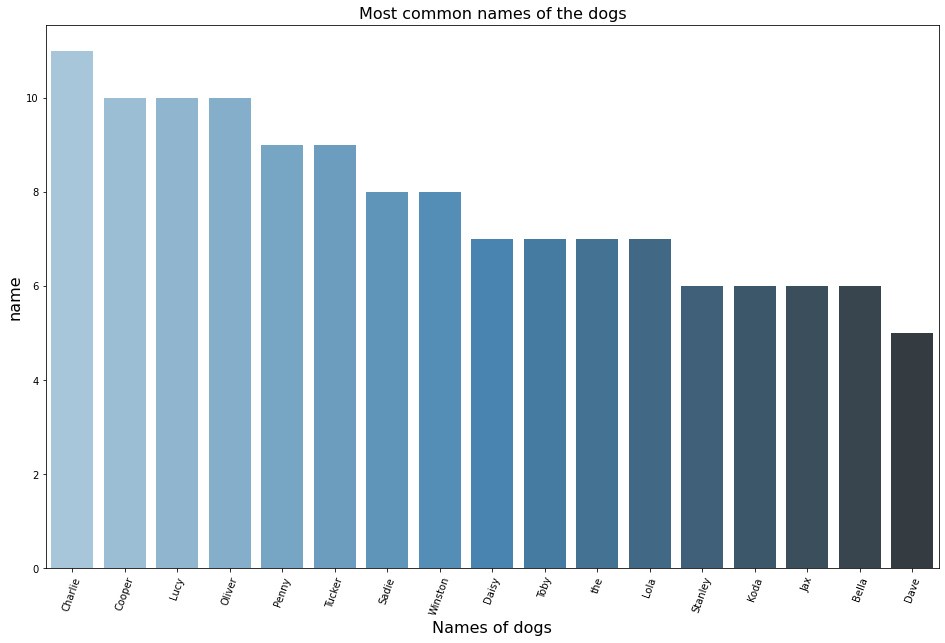

In [85]:
fig, ax1 = plt.subplots(figsize=(16, 10))
ax1.set_title('Most common names of the dogs', fontsize=16)
ax1.set_xlabel('Names of dogs', fontsize=16)
ax1.set_ylabel('Count', fontsize=16)
ax1 = sns.barplot(x=x, y=counts, palette=("Blues_d"))
plt.xticks(rotation=70)
plt.show()
sns.despine(fig)

#### Correlation berween variables

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1370 entries, 2015-11-16 01:01:59+00:00 to 2017-08-01 16:23:56+00:00
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              1370 non-null   object 
 1   source                1370 non-null   object 
 2   expanded_urls         1370 non-null   object 
 3   rating_numerator      1370 non-null   float64
 4   rating_denominator    1370 non-null   float64
 5   name                  1370 non-null   object 
 6   dog_stage             1370 non-null   object 
 7   jpg_url               1370 non-null   object 
 8   img_num               1370 non-null   int64  
 9   img_predictions       1203 non-null   object 
 10  img_confidence_level  1370 non-null   float64
 11  favourites_count      1370 non-null   int64  
 12  retweet_count         1370 non-null   int64  
 13  followers_count       1370 non-null   int64  
 14  created_at            13

In [87]:
# to calculate correaltion between continuous numbers
df_cor = df.drop(['tweet_id', 'source', 'expanded_urls', 'name', 'dog_stage', 'jpg_url', 'img_num', 'img_predictions', 'followers_count', 'created_at'], axis=1)
correlations = df_cor.corr()
correlations

,rating_numerator,rating_denominator,img_confidence_level,favourites_count,retweet_count
rating_numerator,1.000000,0.109795,-0.033024,NaN,0.013035
rating_denominator,0.109795,1.000000,-0.040249,NaN,-0.012456
img_confidence_level,-0.033024,-0.040249,1.000000,NaN,0.063461
favourites_count,NaN,NaN,NaN,NaN,NaN
retweet_count,0.013035,-0.012456,0.063461,NaN,1.000000


In the existing `tweet-json.txt` provided by Udacity have `user` value which is same for all dataset. Therefore, decided to not use correlation heatmap

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1370 entries, 2015-11-16 01:01:59+00:00 to 2017-08-01 16:23:56+00:00
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              1370 non-null   object 
 1   source                1370 non-null   object 
 2   expanded_urls         1370 non-null   object 
 3   rating_numerator      1370 non-null   float64
 4   rating_denominator    1370 non-null   float64
 5   name                  1370 non-null   object 
 6   dog_stage             1370 non-null   object 
 7   jpg_url               1370 non-null   object 
 8   img_num               1370 non-null   int64  
 9   img_predictions       1203 non-null   object 
 10  img_confidence_level  1370 non-null   float64
 11  favourites_count      1370 non-null   int64  
 12  retweet_count         1370 non-null   int64  
 13  followers_count       1370 non-null   int64  
 14  created_at            13